In [97]:
import csv
from Bio import SeqIO
from Bio.Seq import Seq

def translate_dna(dna_sequence):
    """Translate a DNA sequence to a protein sequence."""
    dna_seq = Seq(str(dna_sequence))
    protein_seq = dna_seq.translate()
    return protein_seq

def calculate_relative_length(protein_seq, ancestral_length):
    """Calculate the length of the protein sequence relative to the ancestral length."""
    try:
        start = protein_seq.index('M')
        end = protein_seq.index('*', start)
        protein_length = end - start
    except ValueError:
        # In case 'M' or '*' is not found
        protein_length = 0

    return protein_length, protein_length / ancestral_length * 100




In [98]:
# Read and translate the ancestral DNA sequence from a FASTA file
ancestral_file_path = 'AT2G25450_CDS.txt'
ancestral_record = next(SeqIO.parse(ancestral_file_path, "fasta"))
ancestral_protein = translate_dna(ancestral_record.seq)
ancestral_length = len(ancestral_protein)-1

# Print the translated ancestral protein sequence and its length
print("Ancestral Protein Sequence:", ancestral_protein)
print("Length of Ancestral Protein:", ancestral_length)

Ancestral Protein Sequence: MAENYDRASELKAFDEMKIGVKGLVDAGVTKVPRIFHNPHVNVANPKPTSTVVMIPTIDLGGVFESTVVRESVVAKVKDAMEKFGFFQAINHGVPLDVMEKMINGIRRFHDQDPEVRKMFYTRDKTKKLKYHSNADLYESPAASWRDTLSCVMAPDVPKAQDLPEVCGEIMLEYSKEVMKLAELMFEILSEALGLSPNHLKEMDCAKGLWMLCHCFPPCPEPNRTFGGAQHTDRSFLTILLNDNNGGLQVLYDGYWIDVPPNPEALIFNVGDFLQLISNDKFVSMEHRILANGGEEPRISVACFFVHTFTSPSSRVYGPIKELLSELNPPKYRDTTSESSNHYVARKPNGNSSLDHLRI*
Length of Ancestral Protein: 359


In [117]:
# Prepare to write the output to a CSV file
output_csv_path = 'protein_lengths.csv'
with open(output_csv_path, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Protein Sequence', 'Length', 'Percentage Length','Nonsense Codon Index','Mutant Codon','Ancestral Codon'])

    # Read and process each mutant sequence in the FASTA file
    fasta_file_path = 'gsloh_mutants.txt'
    for record in SeqIO.parse(fasta_file_path, "fasta"):
        mutant_dna = record.seq
        mutant_protein = translate_dna(mutant_dna)
        length, percentage_length = calculate_relative_length(mutant_protein, ancestral_length)
       
        if int(length) < int(len(ancestral_protein)):
            last_aa_index = int(length)
            last_codon_start = last_aa_index * 3
            mutant_last_codon = record.seq[last_codon_start:last_codon_start+3]

            ancestral_last_codon = ancestral_dna[last_codon_start:last_codon_start+3]
            csvwriter.writerow([mutant_protein, length, f"{percentage_length:.2f}%", last_codon_start, str(mutant_last_codon), str(ancestral_last_codon)])
        else:
            csvwriter.writerow([mutant_protein, length, f"{percentage_length:.2f}%", 'NA', 'NA', 'NA'])
            

print(f"Output written to {output_csv_path}")


Output written to protein_lengths.csv


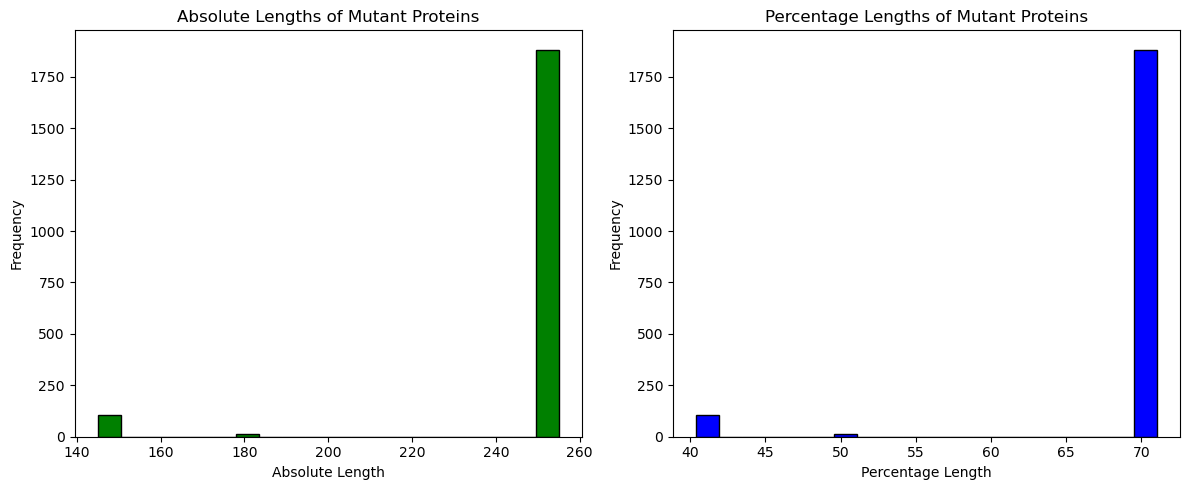

In [124]:
import csv
import matplotlib.pyplot as plt

# Read data from the CSV file
absolute_lengths = []
percentage_lengths = []
csv_file_path = 'protein_lengths.csv'

with open(csv_file_path, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip the header row
    for row in csvreader:
        try:
            # Convert length to integer and append to the absolute lengths list
            absolute_lengths.append(int(row[1]))
            # Convert percentage to float and append to the percentage lengths list
            percentage_lengths.append(float(row[2].rstrip('%')))
        except ValueError:
            continue  # Skip rows with invalid data

# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for Absolute Lengths
axs[0].hist(absolute_lengths, bins=20, color='green', edgecolor='black')
axs[0].set_title('Absolute Lengths of Mutant Proteins')
axs[0].set_xlabel('Absolute Length')
axs[0].set_ylabel('Frequency')

# Histogram for Percentage Lengths
axs[1].hist(percentage_lengths, bins=20, color='blue', edgecolor='black')
axs[1].set_title('Percentage Lengths of Mutant Proteins')
axs[1].set_xlabel('Percentage Length')
axs[1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()



In [126]:
import csv
from collections import Counter

# Path to the CSV file
csv_file_path = 'protein_lengths.csv'

def read_rows_and_count(csv_file):
    rows = []
    with open(csv_file, 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)  # Read the header row
        # Read and store rows excluding the first column
        for row in csvreader:
            rows.append(tuple(row[1:]))  # Skip the first column
    return header, rows

# Read rows and the header from the CSV
header, rows = read_rows_and_count(csv_file_path)

# Count the frequency of each unique row (excluding the first column)
row_counts = Counter(rows)

# Print the column names (excluding the first one)
print("Column Names:", header[1:])

# Print unique rows and their frequency
for row, count in row_counts.items():
    print(f"{row}: Frequency = {count}")



Column Names: ['Length', 'Percentage Length', 'Nonsense Codon Index', 'Mutant Codon', 'Ancestral Codon']
('255', '71.03%', '765', 'TGA', 'ACG'): Frequency = 1881
('145', '40.39%', '435', 'TGA', 'CTG'): Frequency = 106
('180', '50.14%', '540', 'TAA', 'AAG'): Frequency = 12
('255', '71.03%', '765', 'TAA', 'ACG'): Frequency = 1
